# Forest Plots

> Explanation of how to use forest_plot for contrast objects e.g delta-delta and mini-meta or regular deltas.

- order: 7

In DABEST **v2025.03.27**, we introduce a new function to plot separately calculated effect sizes in the same axes to allow direct visual comparisons. 

Currently you can make a forest plot for delta-delta, mini-meta, or standard delta effect sizes. In addition, for delta-delta and mini-meta experiments, you can also plot the effect sizes of the original comparisons alongside the delta-delta/mini-meta measurement.

## Load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import dabest
from dabest.multi import combine, vortexmap

In [ ]:
def create_delta_dataset(N=20, 
                        seed=9999, 
                        second_quarter_adjustment=3, 
                        third_quarter_adjustment=-0.1,
                        scale2=1):
    """Create a sample dataset for delta-delta analysis."""
    np.random.seed(seed)

    # Create samples
    y = norm.rvs(loc=3, scale=0.4, size=N*4)
    y[N:2*N] = norm.rvs(loc=3 + second_quarter_adjustment, scale=scale2, size=N) 
    y[2*N:3*N] = norm.rvs(loc=3 + third_quarter_adjustment, scale=0.4, size=N)
    y[3*N:4*N] = norm.rvs(loc=3, scale=0.4, size=N)

    # Treatment, Rep, Genotype, and ID columns
    treatment = np.repeat(['Placebo', 'Drug'], N*2).tolist()
    genotype = np.repeat(['W', 'M', 'W', 'M'], N).tolist()
    id_col = list(range(0, N*2)) * 2

    # Combine all columns into a DataFrame
    df = pd.DataFrame({
        'ID': id_col,
        'Genotype': genotype,
        'Treatment': treatment,
        'Tumor Size': y
    })

    return df

In [ ]:
df_drug1 = create_delta_dataset(seed=9999, second_quarter_adjustment=1, third_quarter_adjustment=-0.5)
df_drug2 = create_delta_dataset(seed=9999, second_quarter_adjustment=0.1, third_quarter_adjustment=-1)
df_drug3 = create_delta_dataset(seed=9999, second_quarter_adjustment=2, third_quarter_adjustment=-0.5)
df_drug4 = create_delta_dataset(seed=9999, second_quarter_adjustment=1, third_quarter_adjustment=-0.1, scale2=7)
df_drug5 = create_delta_dataset(seed=9999, second_quarter_adjustment=0.1, third_quarter_adjustment=-0.3, scale2=7)

In [ ]:
contrast1 = dabest.load(data=df_drug1, 
                       x=["Genotype", "Genotype"], 
                       y="Tumor Size", 
                       delta2=True, 
                       experiment="Treatment").hedges_g

contrast2 = dabest.load(data=df_drug2, 
                       x=["Genotype", "Genotype"], 
                       y="Tumor Size", 
                       delta2=True, 
                       experiment="Treatment").hedges_g

contrast3 = dabest.load(data=df_drug3, 
                       x=["Genotype", "Genotype"], 
                       y="Tumor Size", 
                       delta2=True, 
                       experiment="Treatment").hedges_g

contrast4 = dabest.load(data=df_drug4, 
                       x=["Genotype", "Genotype"], 
                       y="Tumor Size", 
                       delta2=True, 
                       experiment="Treatment").hedges_g

contrast5 = dabest.load(data=df_drug5, 
                       x=["Genotype", "Genotype"], 
                       y="Tumor Size", 
                       delta2=True, 
                       experiment="Treatment").hedges_g

contrasts = [contrast1, contrast2, contrast3, contrast4, contrast5]

MultiContrast with 5 contrasts: ['Drug1', 'Drug2', 'Drug3', 'Drug4', 'Drug5']


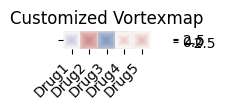

In [ ]:
multi = combine(contrasts, labels=["Drug1", "Drug2", "Drug3", "Drug4", "Drug5"])
print(multi)
fig, ax, mean_delta = vortexmap(
    multi,
    n=30,  # Larger spiral size
    vmax=4, vmin=-4,  # Extended color range
    reverse_neg=True,
    abs_rank=False,
    chop_tail=5  # Remove 5% extreme values
)
plt.title("Customized Vortexmap")
plt.show()

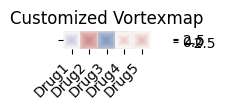